In [10]:
import pandas as pd

# Load the data
data = pd.read_csv('daily_predictions.csv')

# Display the first few rows of the dataframe to understand its structure
data.head()

,Date,SP500,DOW30,EuroStoxx50,NASDAQ,CrudeOil,SSE,Gold,VIX,Nikkei225,...,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply,Target,prediction_interval,predicted
0,2023-08-02,4513.390137,35282.519531,4336.500000,13973.450195,79.489998,3261.689941,1937.400024,16.09,32707.689453,...,1.763625,801423,4.043330e+08,5.232831e+13,555.849673,1570630,19446412,29178.679688,"[27446.000181957545, 29837.91345365752]",28641.956818
1,2023-08-03,4501.890137,35215.890625,4304.629883,13959.719727,81.550003,3280.462891,1932.000000,15.92,32159.279297,...,1.450894,801574,3.936784e+08,5.232831e+13,570.893333,1690188,19448100,29074.091797,"[22628.636989142382, 34588.203347642244]",28608.420168
2,2023-08-04,4478.029785,35065.621094,4332.910156,13909.240234,82.820000,3288.083984,1939.599976,17.10,32192.750000,...,2.073791,801695,3.198924e+08,5.232831e+13,702.575000,1594248,19448100,29042.126953,"[20233.162889455518, 36976.55579135532]",28604.859340
3,2023-08-05,4478.029785,35065.621094,4332.910156,13909.240234,82.820000,3288.083984,1939.599976,17.10,32192.750000,...,1.160933,801849,4.048329e+08,5.232831e+13,555.163399,1692858,19449062,29041.855469,"[18275.756658513703, 38712.272610392974]",28494.014634
4,2023-08-06,4478.029785,35065.621094,4332.910156,13909.240234,82.820000,3288.083984,1939.599976,17.10,32192.750000,...,0.832805,802013,4.444470e+08,5.232831e+13,505.680982,1709818,19450093,29180.578125,"[16749.9807717621, 40307.59445896401]",28528.787615


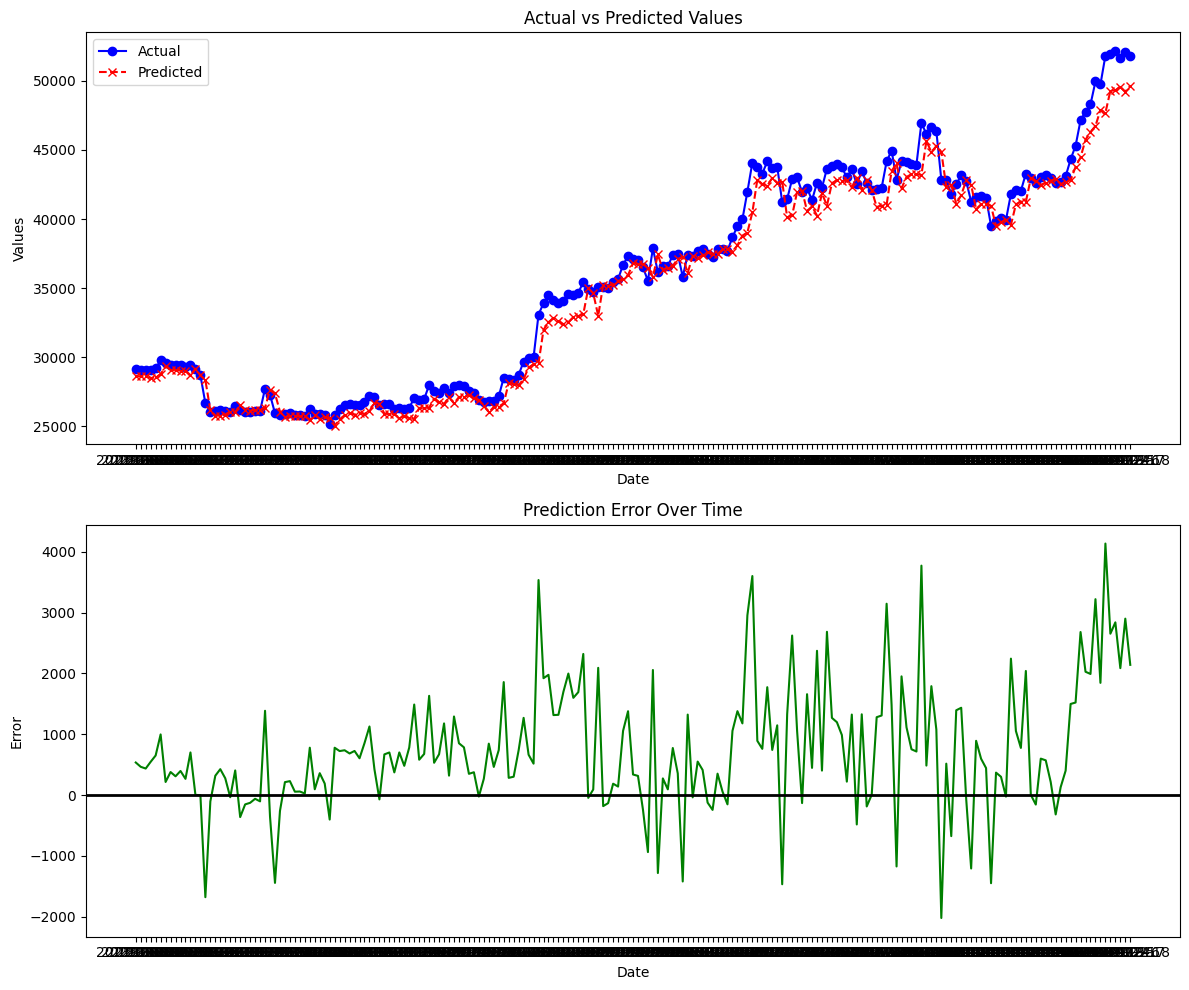

In [11]:
import matplotlib.pyplot as plt

# Calculate the error
data['error'] = data['Target'] - data['predicted']

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Actual vs Predicted
ax[0].plot(data['Date'], data['Target'], label='Actual', color='blue', marker='o')
ax[0].plot(data['Date'], data['predicted'], label='Predicted', color='red', linestyle='--', marker='x')
ax[0].set_title('Actual vs Predicted Values')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Values')
ax[0].legend()

# Error Distribution
ax[1].plot(data['Date'], data['error'], label='Prediction Error', color='green')
ax[1].set_title('Prediction Error Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Error')
ax[1].axhline(0, color='black', lw=2)  # Add a line at error=0 for reference

plt.tight_layout()
plt.show()

In [12]:
mean_error = data['error'].mean()
std_error = data['error'].std()
threshold = mean_error - std_error

significant_errors_below_zero = data[data['error'] < threshold]

significant_errors_below_zero[['Date', 'error']]

,Date,error
14,2023-08-16,-1677.288716
21,2023-08-23,-360.608131
27,2023-08-29,-350.484436
28,2023-08-30,-1442.467291
39,2023-09-10,-401.184836
103,2023-11-13,-936.009387
105,2023-11-15,-1280.444326
110,2023-11-20,-1419.187935
130,2023-12-10,-1464.807513
145,2023-12-25,-481.831944


In [13]:
significant_dates = significant_errors_below_zero['Date']

# Now, let's compute the mean and standard deviation for all columns on the entire dataset and on the significant dates
overall_stats = data.describe().loc[['mean', 'std']]
significant_date_stats = data[data['Date'].isin(significant_dates)].describe().loc[['mean', 'std']]

# We'll compare the stats to see if there's a noticeable difference for any column
comparison_stats = pd.concat([overall_stats, significant_date_stats], keys=['Overall', 'Significant Dates'])

comparison_stats

SP500         DOW30  EuroStoxx50        NASDAQ  \
Overall           mean  4556.812986  35623.781619  4353.719362  14189.579714   
                  std    231.589211   1817.927911   189.217729    855.724912   
Significant Dates mean  4623.479370  36154.757080  4394.701874  14436.108765   
                  std    174.777715   1528.836944   123.439243    645.210816   

                         CrudeOil          SSE         Gold        VIX  \
Overall           mean  79.559503  3018.181666  1971.797508  14.903134   
                  std    6.316421   121.712002    63.035044   2.407454   
Significant Dates mean  76.200625  2988.830475  1983.943748  13.933750   
                  std    4.743924   130.147361    54.144074   1.220458   

                           Nikkei225      FTSE100  ...  \
Overall           mean  33270.302015  7533.584604  ...   
                  std    1760.986893   121.323642  ...   
Significant Dates mean  33605.578857  7512.631226  ...   
                  std    1525.727806   112.074132  ...   

                        average_transaction_value   block_height  \
Overall           mean                   1.904029  816207.805970   
                  std                    0.769677    8617.353947   
Significant Dates mean                   1.699564  817367.000000   
                  std                    0.645833    9174.029438   

                            hashrate    difficulty  block_time    block_size  \
Overall           mean  4.716245e+08  6.353738e+13  583.961484  1.683380e+06   
                  std   7.324102e+07  7.811638e+12   58.315602  1.021955e+05   
Significant Dates mean  4.760791e+08  6.527054e+13  595.454633  1.691188e+06   
                  std   7.837495e+07  8.100504e+12   68.334503  6.196997e+04   

                        current_supply        Target     predicted  \
Overall           mean    1.953884e+07  35647.642539  34898.220025   
                  std     5.387061e+04   7780.062076   7436.354220   
Significant Dates mean    1.954605e+07  35833.712158  36874.352136   
                  std     5.733665e+04   7113.969345   7239.103360   

                              error  
Overall           mean   749.422514  
                  std   1015.971682  
Significant Dates mean -1040.639978  
                  std    544.386300  

[4 rows x 33 columns]

In [15]:
def calculate_near_weekly_average_stats(date_series, data, window=3):
    """
    Calculate near-weekly average statistics for each column in the dataframe.
    
    Parameters:
    - date_series: Series containing the dates.
    - data: DataFrame containing the data.
    - window: Number of days to consider before and after each date for averaging.
    
    Returns:
    - DataFrame containing near-weekly average statistics.
    """
    near_weekly_avg_stats = pd.DataFrame()
    
    for date in date_series:
        # Define the window of dates centered around the current date
        start_date = pd.to_datetime(date) - pd.Timedelta(days=window)
        end_date = pd.to_datetime(date) + pd.Timedelta(days=window)
        
        # Filter the data for the window of dates
        window_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
        
        # Calculate the mean and standard deviation for each column
        window_stats_mean = window_data.mean()
        window_stats_std = window_data.std()
        
        # Append to the result DataFrame
        near_weekly_avg_stats = pd.concat([near_weekly_avg_stats, window_stats_mean, window_stats_std], axis=1, keys=[date])
    
    near_weekly_avg_stats = near_weekly_avg_stats.rename_axis(index={'mean': 'near_weekly_avg_mean', 'std': 'near_weekly_avg_std'})
    
    return near_weekly_avg_stats

# Calculate near-weekly average statistics for significant error dates
near_weekly_avg_stats = calculate_near_weekly_average_stats(significant_dates, data)

near_weekly_avg_stats

TypeError: Could not convert ['[9238.138258550454, 48175.66528998419][8835.748253811485, 49498.27387271101][7542.174387842479, 49859.43999056883][6386.9940956425235, 50296.684899333166][3429.6196492247, 48875.97181152416][2310.4661564925227, 49243.19357823702][1575.9463004798163, 49949.39854060627]'] to numeric